11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6857 - accuracy: 0.8133 - val_loss: 0.3375 - val_accuracy: 0.9046
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3142 - accuracy: 0.9090 - val_loss: 0.2771 - val_accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2643 - accuracy: 0.9230 - val_loss: 0.2383 - val_accuracy: 0.9312
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2310 - accuracy: 0.9327 - val_loss: 0.2165 - val_accuracy: 0.9349
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9394 - val_loss: 0.1906 - val_accuracy: 0.9435
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1875 - accuracy: 0.9454 - val_loss: 0.1780 - val_accuracy: 0.9466
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - 

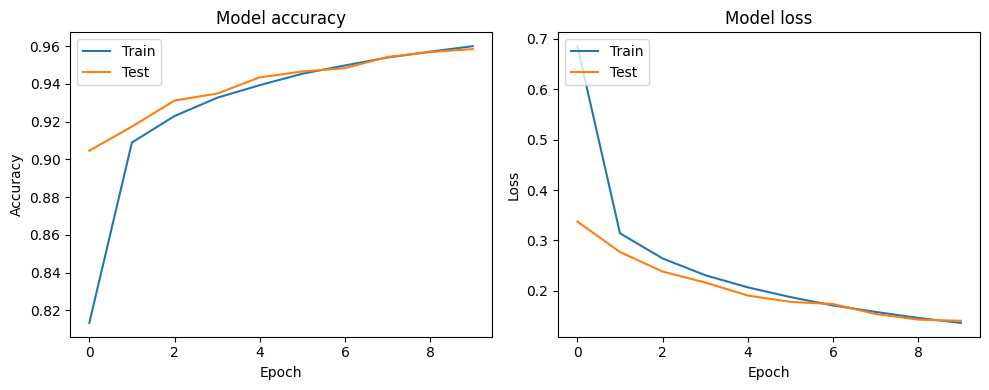

In [1]:
# Step 1: Import necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # Change the dataset import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load MNIST data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255  # Flatten and normalize
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Step 3: Define the network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # Adjust input shape to 784 (28x28)
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Update to 10 output classes for MNIST
])

# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# Step 7: Plot the training loss and accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()